In [1]:
import sys, os
import pandas as pd
import numpy as np
import warnings

import cv2
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2

Using TensorFlow backend.


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(35887, 48, 48)
angry 4953
disgust 547
fear 5120
happy 8988
sad 6077
surprise 4002
neural 6198


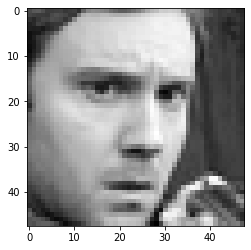

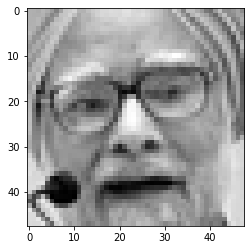

In [4]:
num_features = 64
num_labels = 7
batch_size = 128
epochs = 1
width, height = 48, 48

x = np.load('/content/drive/My Drive/face_recognisation/fdataX.npy')
y = np.load('/content/drive/My Drive/face_recognisation/flabels.npy')
x = x.astype('float32')
x = np.reshape(x ,(35887, 48, 48))
print(x.shape)
# x -= np.mean(x, axis=0)
# x /= np.std(x, axis=0)
 
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
for i in range(35885):
  if y[i][0] == 1:
    a += 1
  if y[i][1] == 1:
    b += 1
  if y[i][2]== 1:
    c += 1
  if y[i][3] == 1:
    d  += 1
  if y[i][4] == 1:
    e += 1
  if y[i][5] == 1:
    f += 1
  if y[i][6] == 1:
    g += 1

print("angry",a)
print("disgust",b)
print("fear",c)
print("happy",d)
print("sad",e)
print("surprise",f)
print("neural",g)
for xx in range(2):
    plt.figure(xx)
    plt.imshow(x[xx].reshape((48, 48)), interpolation='none',cmap='gray')
    plt.show()



In [5]:
y_new = np.argmax(y,axis = 1)

In [6]:
# from skimage import feature
# data = []

# for i in range(x.shape[0]):
#     H = feature.hog(x[i], orientations=9, pixels_per_cell=(8, 8),
# 	      cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
#     # (H, hogImage) = feature.hog(x[i], orientations=9, pixels_per_cell=(8, 8),
# 	#                   cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1",
# 	#           visualize=True)
#     data.append(H)
data = np.load('/content/drive/My Drive/face_recognisation/histog_x.npy')

In [7]:
# np.save('histog_x', data)
print(data.shape)

(35887, 900)


In [8]:
data = np.array(data)
X_train, X_test, y_train, y_test = train_test_split(data, y_new, test_size=3/14, random_state=1,stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(28196, 900)
(7691, 900)
(7691,)


In [9]:
from sklearn.svm import SVC
clf = SVC(C = 100, gamma = 0.1)
#clf = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)

In [10]:
clf.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
predictions = clf.predict(X_test)

In [12]:
np.mean(predictions == y_test)

0.5293199843973475

[[ 432    3  107  155  151   35  179]
 [  13   60   11   10   17    2    4]
 [ 152    9  420   96  187   89  145]
 [ 105    3   71 1444  142   41  120]
 [ 174    5  152  191  505   32  243]
 [  46    4   89   92   37  545   45]
 [ 135    1   93  193  207   34  665]]
  


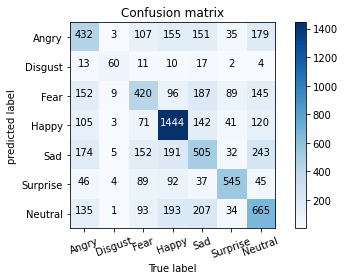

In [13]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = predictions
cm = confusion_matrix(y_true, y_pred)
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
title='Confusion matrix'
print(cm)
print("  ")

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=20)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = (cm.max()) / 2 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('predicted label')
plt.xlabel('True label')
plt.tight_layout()
plt.show()